<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compositional-plot" data-toc-modified-id="Compositional-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compositional plot</a></span></li><li><span><a href="#Zeros" data-toc-modified-id="Zeros-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Zeros</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.stats.composition import clr_inv, closure
%matplotlib inline

np.random.seed(0)

# Compositional plot

In [2]:
k = 25   # number of samples per group
d = 100  # number of microbes
ef = 1e3
df = np.array([-1] * (d // 4) + [0] * (d // 2) + [1] * (d // 4))
mA = np.random.randn(d) * 0.5
mB = np.random.randn(d) * 0.5 - df
A = np.vstack([np.random.dirichlet(ef * clr_inv(mA)) for _ in range(k)])
B = np.vstack([np.random.dirichlet(ef * clr_inv(mB)) for _ in range(k)])
probs = pd.DataFrame(np.vstack((A, B)))

# sort the species by the differential
AB = pd.Series(np.log(clr_inv(mA) / clr_inv(mB)))
AB = AB.sort_values()
probs = probs.loc[:, AB.index]

idx = np.array([0] * k + [1] * k).astype(np.bool)
# scenario 1 : no change in biomass
depths = np.array([1000] * k + [1000] * k).reshape(-1, 1)
counts1 = probs * depths
# scenario 2 : strict decrease in biomass
depths = np.array([1000] * k + [100] * k).reshape(-1, 1)
counts2 = probs * depths

<ipython-input-2-125407ab3021>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.array([0] * k + [1] * k).astype(np.bool)


In [3]:

probs1 = counts1.apply(lambda x: x / x.sum(), axis=1)
probs2 = counts2.apply(lambda x: x / x.sum(), axis=1)

mAB1 = np.mean(np.log(counts1.loc[idx]).values - np.log(counts1.loc[~idx]).values, axis=0)
# sAB1 = np.std(np.log(counts1.loc[idx]).values - np.log(counts1.loc[~idx]), axis=0)

mAB2 = np.mean(np.log(counts2.loc[idx]).values - np.log(counts2.loc[~idx]).values, axis=0)
# sAB2 = np.std(np.log(counts2.loc[idx]).values - np.log(counts2.loc[~idx]).values, axis=0)

pAB1 = np.mean(np.log(probs1.loc[idx]).values - np.log(probs1.loc[~idx]).values, axis=0)
pAB2 = np.mean(np.log(probs2.loc[idx]).values - np.log(probs2.loc[~idx]).values, axis=0)

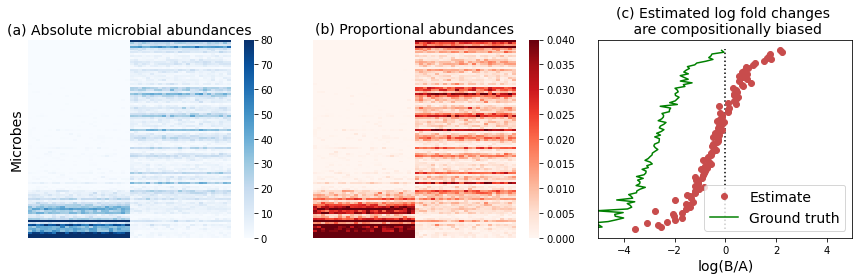

In [15]:
from matplotlib.colors import Normalize
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

def count_heatmap(ax, counts, normalize=False, fs=14, cmap='viridis'):
    
    if normalize:
        counts = closure(counts.T).T
        norm = Normalize(vmin=0, vmax=0.04)
    else:
        norm = Normalize(vmin=0, vmax=80)
    sns.heatmap(counts, ax=ax, robust=True, norm=norm, cmap=cmap)
    #ax.set_xlabel('Samples \n (A | B)', fontsize=fs)
    #ax.set_ylabel('Microbes', fontsize=fs)
    ax.set_xticks([])
    ax.set_yticks([])
    
count_heatmap(ax[0], counts1.T.iloc[::-1, ::-1], normalize=False, cmap='Blues')
count_heatmap(ax[1], counts1.T.iloc[::-1, ::-1], normalize=True, cmap='Reds')

fs = 14

ax[0].set_title('(a) Absolute microbial abundances', 
                fontsize=fs)
ax[1].set_title('(b) Proportional abundances', 
                fontsize=fs)
ax[0].set_ylabel('Microbes', fontsize=fs)

ax[2].vlines(0, 0, len(pAB2), color='k', linestyle=':')
x = np.arange(len(pAB2))
ax[2].plot(pAB2[::-1], x, 'o', color='#C84C4C', label='Estimate')
ax[2].plot(mAB2[::-1], x, '-', color='g', label='Ground truth')
#'#4C88C8'
ax[2].set_yticks([])
ax[2].set_xlim([-5, 5])
ax[2].set_xlabel('log(B/A)', fontsize=14)
#ax[2].set_ylabel('Observed truth \n log fold change', fontsize=14)
ax[2].set_title('(c) Estimated log fold changes \n are compositionally biased',
                fontsize=fs)
ax[2].legend(fontsize=14)
plt.tight_layout()

Total number of false positives in scenario 2

In [5]:
np.sum(pAB2>0)

34

# Zeros

In [6]:
k = 25   # number of samples per group
d = 100  # number of microbes
ef = 1e3
df = np.array([-1] * (d // 4) + [0] * (d // 2) + [1] * (d // 4))
mA = np.random.randn(d) * 1
mB = np.random.randn(d) * 1 - df * 5
A = np.vstack([np.random.dirichlet(ef * clr_inv(mA)) for _ in range(k)])
B = np.vstack([np.random.dirichlet(ef * clr_inv(mB)) for _ in range(k)])
probs = pd.DataFrame(np.vstack((A, B)))

# sort the species by the differential
AB = pd.Series(np.log(clr_inv(mA) / clr_inv(mB)))
AB = AB.sort_values()
probs = probs.loc[:, AB.index]

idx = np.array([0] * k + [1] * k).astype(np.bool)
# scenario 1 : no change in biomass
depths = np.array([1000] * k + [1000] * k).reshape(-1, 1)
counts1 = probs * depths
# scenario 2 : strict decrease in biomass
depths = np.array([1000] * k + [100] * k).reshape(-1, 1)
counts2 = probs * depths

rcounts1 = counts1.astype(np.int64)
rcounts2 = counts2.astype(np.int64)

<ipython-input-6-873c6928069a>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.array([0] * k + [1] * k).astype(np.bool)


<ipython-input-7-e8fbb7e71842>:7: RuntimeWarning: divide by zero encountered in true_divide
  freq_lfc = np.log(rcounts1.loc[~idx].values.sum(axis=0) / rcounts1.loc[idx].values.sum(axis=0))


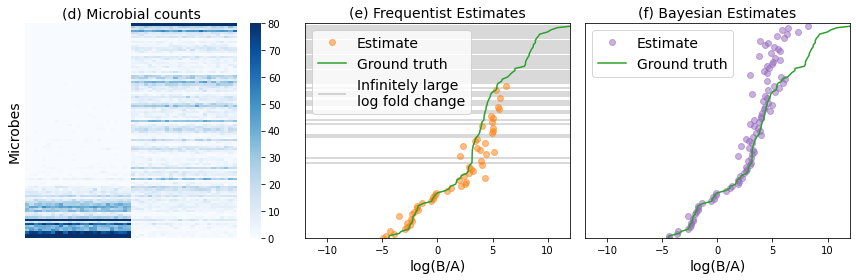

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
count_heatmap(ax[0], rcounts1.T.iloc[::-1, ::-1], normalize=False, fs=14, cmap='Blues')
ax[0].set_title('(d) Microbial counts', fontsize=fs)
ax[0].set_ylabel('Microbes', fontsize=fs)

# frequentist log fold change
freq_lfc = np.log(rcounts1.loc[~idx].values.sum(axis=0) / rcounts1.loc[idx].values.sum(axis=0))

# bayesian log fold change
s = 20
Asamp = np.mean([np.random.dirichlet(counts1.loc[~idx].values.sum(axis=0) + 1) for _ in range(s)], axis=0)
Bsamp = np.mean([np.random.dirichlet(counts1.loc[idx].values.sum(axis=0) + 1) for _ in range(s)], axis=0)
bayes_lfc = np.log(Asamp / Bsamp)

fs = 14
x = np.arange(counts1.shape[1])
#ax[1].plot((counts1.loc[~idx]==0).sum(axis=0).values, x)
infs = (rcounts1.loc[idx]>0).sum(axis=0).values
#ax[1].scatter(infs[infs > 0], x[infs > 0], color='k', label='Observed')
#ax[1].scatter(infs[infs == 0], x[infs == 0], facecolors='none', 
#              edgecolors='k', linewidth=0.5, label='Not observed')
#ax[1].set_xlabel('Number of samples \n observed in group B', fontsize=fs)
#ax[1].set_yticks([])
#ax[1].set_title('(e) Observed microbes', fontsize=fs)
#ax[1].legend(fontsize=fs, loc=1)

ax[1].set_xlabel('log(B/A)', fontsize=fs)
ax[1].set_yticks([])
ax[1].plot(freq_lfc, x, 'o', color='tab:orange', alpha=0.5, label='Estimate')
ax[1].plot(AB.values, x, color='tab:green', label='Ground truth')
ax[1].hlines(x[infs == 0], -12, 12, color='k', linestyle='-', alpha=0.2, 
             label='Infinitely large \nlog fold change')
ax[1].set_title('(e) Frequentist Estimates', fontsize=fs)
ax[1].set_xlim([-12, 12])
ax[1].set_ylim([0, len(x)])
ax[1].legend(fontsize=fs, loc=2)

ax[2].set_xlabel('log(B/A)', fontsize=fs)
ax[2].set_yticks([])
ax[2].plot(bayes_lfc, x, 'o', color='tab:purple', alpha=0.5, label='Estimate')
ax[2].plot(AB.values, x, color='tab:green', label='Ground truth')
ax[2].set_title('(f) Bayesian Estimates', fontsize=fs)
ax[2].set_xlim([-12, 12])
ax[2].set_ylim([0, len(x)])
ax[2].legend(fontsize=fs, loc=2)
plt.tight_layout()

In [8]:
ax.vlines?

Object `ax.vlines` not found.


In [9]:
ax[1].vlines

<bound method Axes.vlines of <AxesSubplot:title={'center':'(e) Frequentist Estimates'}, xlabel='log(B/A)'>>

In [10]:
mAB2[::-1]

array([-5.87892491, -4.85882741, -4.96905436, -5.40656945, -4.61959039,
       -4.29725275, -4.01026634, -4.34052525, -4.36053303, -4.02811862,
       -5.08264381, -3.85613036, -3.69112532, -3.74855052, -3.86562743,
       -3.57278164, -4.28189268, -3.65255084, -3.70803631, -3.81029133,
       -3.50197205, -3.48902387, -3.36009584, -3.15589123, -3.51755419,
       -3.37858877, -3.36344191, -3.45802362, -3.2372687 , -3.49995705,
       -3.2030353 , -3.13440834, -3.12446935, -3.28118946, -3.03572853,
       -3.09785568, -2.88199362, -2.96043481, -3.16662148, -3.03984781,
       -2.97154838, -2.88881096, -2.87817362, -2.77270325, -2.6618191 ,
       -2.76272348, -2.81935741, -2.789982  , -2.62142787, -2.60649062,
       -2.60229515, -2.7839614 , -2.55934136, -2.70878413, -2.5283542 ,
       -2.42357185, -2.60219287, -2.56337211, -2.42633123, -2.34164025,
       -2.64744118, -2.50956197, -2.44484707, -2.43530611, -2.49911595,
       -2.20880408, -2.20501441, -2.1581018 , -2.56892466, -1.89